In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

## Loading the Dataset

In [2]:

def readImages(path):
    folders = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    imageData = []
    imageLabel = []
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    for folder in folders:
        folderPath = os.path.join(path, folder)
        for img in os.listdir(folderPath):
            imagePath = os.path.join(folderPath, img)
            image = cv2.imread(imagePath)
            
            if image is None:  
                continue
            
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
            
            if len(faces) == 0:  
                continue
            
            x, y, w, h = faces[0]
            face = image[y:y+h, x:x+w]
            
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (48, 48))
            
            imageData.append(face)
            imageLabel.append(folders.index(folder))
    
    return imageData, imageLabel

In [3]:
path = "Dataset/Train"

trainData, trainLabel = readImages (path)

In [4]:
path = "Dataset/Test"

trainData1, trainLabel1 = readImages (path)

In [5]:
len(trainData1)

12388

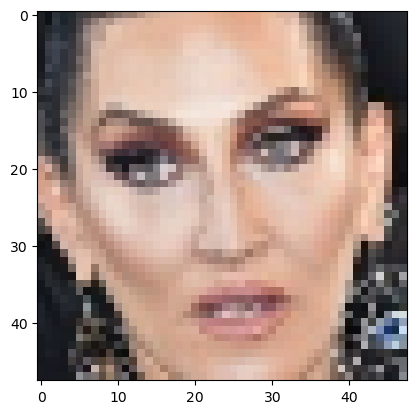

In [6]:
plt.imshow (trainData1[0])

## Joining the Data

In [7]:
trainData.extend(trainData1)
trainLabel.extend(trainLabel1)

In [8]:
len(trainData)

26012

In [9]:
len (trainLabel)

26012

In [10]:
trainData[0].shape

(48, 48, 3)

In [11]:
X = np.array(trainData)

In [12]:
X.dtype

dtype('uint8')

In [13]:
X = X.astype ('float32')

In [14]:
X.dtype

dtype('float32')

In [15]:
X = X/255.0

In [16]:
X[0].max()

0.8980392

In [17]:
Y = np.array(trainLabel)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
x_test.shape

(5203, 48, 48, 3)

## Building the CNN Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Activation, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential()

model.add(Input(shape=(48, 48, 3)))

model.add (Conv2D(16, (3,3), 1, padding='same', activation='relu'))
model.add (MaxPooling2D())
model.add (Dropout (0.2))

model.add (Conv2D(32, (3,3), 1, padding='same', activation='relu'))
model.add (MaxPooling2D())
model.add (Dropout (0.2))

model.add (Conv2D(64, (3,3), 1, padding='same', activation='relu'))
model.add (MaxPooling2D())
model.add (Dropout (0.2))

#model.add (GlobalAveragePooling2D())
model.add (Flatten())

model.add (Dense (256, activation='relu'))
model.add (Dropout(0.5))


model.add (Dense (7, activation='softmax'))

In [30]:
model.compile (loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 615,463 (2.35 MB)

 Trainable params: 615,463 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1)

In [33]:
history = model.fit (x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=512, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 347ms/step - accuracy: 0.1844 - loss: 1.9398 - val_accuracy: 0.1814 - val_loss: 1.9228
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 335ms/step - accuracy: 0.2187 - loss: 1.9024 - val_accuracy: 0.2700 - val_loss: 1.8190
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - accuracy: 0.3071 - loss: 1.7623 - val_accuracy: 0.4086 - val_loss: 1.6165
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - accuracy: 0.3712 - loss: 1.6219 - val_accuracy: 0.4478 - val_loss: 1.5079
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 376ms/step - accuracy: 0.4146 - loss: 1.5355 - val_accuracy: 0.4755 - val_loss: 1.4387
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 359ms/step - accuracy: 0.4391 - loss: 1.4694 - val_accuracy: 0.4872 - val_loss: 1.4022
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 352ms/step - accuracy: 0.4544 - loss: 1.4409 - val_accuracy: 0.5095 - val_loss: 1.3510
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 347ms/step - accuracy: 0.4699 - loss: 1.3845 - 

## Plotting Training History

In [34]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

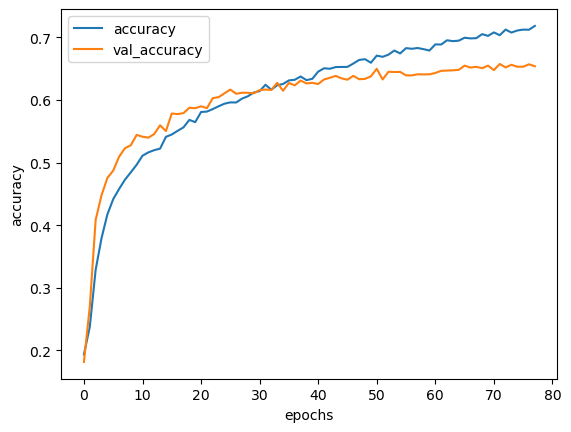

In [35]:
epochs = list (range(len(acc)))
plt.plot(epochs, acc, label='accuracy')
plt.plot (epochs, val_acc, label='val_accuracy')
plt.xlabel ('epochs')
plt.ylabel ('accuracy')
plt.legend()
plt.show()

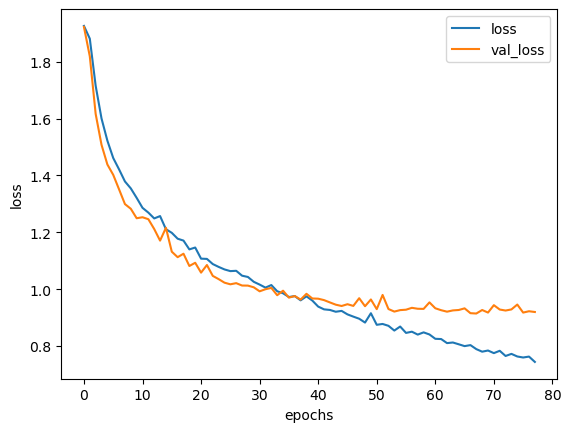

In [36]:
plt.plot(epochs, loss, label='loss')
plt.plot (epochs, val_loss, label='val_loss')
plt.xlabel ('epochs')
plt.ylabel ('loss')
plt.legend()
plt.show()

In [37]:
acu, losss = model.evaluate(x_test, y_test)

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6545 - loss: 0.9085


In [38]:
y_pred = model.predict (x_test)

163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


In [39]:
y_predd = [np.argmax(y_pred[x]) for x in range (0, len(y_pred))]

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix (y_test, y_predd)

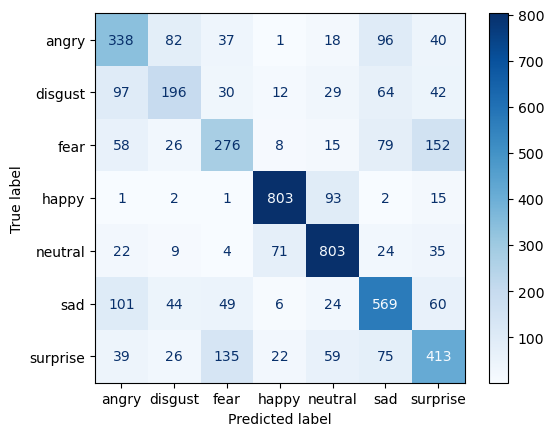

In [41]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [42]:
model.save ('Face_Emotion1.h5')

## Per Class Accuracy

In [46]:
from sklearn.metrics import classification_report

class_names = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

y_pred_classes = y_pred.argmax(axis=1)  
y_true_classes = y_test


print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

       anger       0.52      0.55      0.53       612
     disgust       0.51      0.42      0.46       470
        fear       0.52      0.45      0.48       614
       happy       0.87      0.88      0.87       917
     neutral       0.77      0.83      0.80       968
         sad       0.63      0.67      0.65       853
    surprise       0.55      0.54      0.54       769

    accuracy                           0.65      5203
   macro avg       0.62      0.62      0.62      5203
weighted avg       0.65      0.65      0.65      5203



## Precision, Recall and F1_Score

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Precision: 64.79%
Recall: 65.31%
F1 Score: 64.94%
